### Given a circle of unit radius, create a sample generator following a uniform distribution

#### Idea - 
1. Uniformly sample points from a square that fits inside a circle with unit radius, lets call it the <span style="color:green">**inner square**</span> its a square with side $\sqrt{2}$
2. Rotate the the points using angles generated from a random uniform distribution
3. The idea is rotating this <span style="color:green">**inner square**</span> a large/infinite number of times would in theory generate our unit radius circle 
4. **Therefore** generating a random unifrom sample generator in the unit circle


#### Simulating the idea 
1. Since the <span style="color:green">**inner square**</span> has edge length $\sqrt{2}$ , sample x and y co-ordinates from this square using random uniform distribution between $\frac{-\sqrt{2}}{2}$ and $\frac{\sqrt{2}}{2}$
2. Next, unifromly sample an angle to rotate these these (x,y) co-ordinates from the <span style="color:green">**inner square**</span>

### <span style="color:blue">Result:</span> A halo effect

This method result in two regions each with their own **unifrom distribution**
- A smaller <span style="color:red">circular region</span> with dense unifrom distribution 
- A ring around the <span style="color:red">circular region</span> with a sparse unifrom distribution

i.e halo effect - circular region is shown in the simulation below dotted circle

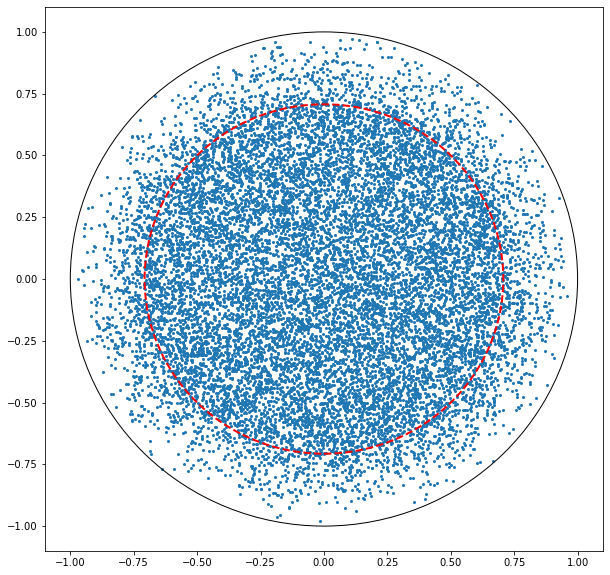

In [1]:
from matplotlib import pyplot as plt
import numpy as np

## a sqaure that fits inside a circle of unit radius has an edge of lenth sqrt 2
rho_x = np.random.uniform(-np.sqrt(2)/2,np.sqrt(2)/2, 15000)
rho_y = np.random.uniform(-np.sqrt(2)/2, np.sqrt(2)/2, 15000)

## rotation angle sampling
phi = np.random.uniform(0, 2*np.pi, 15000)

## rotate
def rotate(x, y, rad):
        xx = np.cos(rad)*x - np.sin(rad)*y
        yy = np.sin(rad)*x + np.cos(rad)*y
        return(xx, yy)
    
xx, yy = rotate(rho_x, rho_y, phi)


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
outerCircle = plt.Circle((0,0),1,color="black",fill=False)
innerCircle = plt.Circle((0,0),np.sqrt(2)/2,color="red",fill=False, linewidth = 2, linestyle = '--')

## the circle of interest
ax.add_patch(outerCircle)

## the apparent circle around with a halo effect
ax.add_patch(innerCircle)

## plot the samples generated
ax.scatter(xx,yy, s =4)
plt.show()

### Thinking through it further - 

- the <span style="color:green">**inner square**</span> share a common area -> the circle that can be fit inside the inner square, lets call it inner circle
- so technically theres two uniform sampling distributions
    - one inside the inner circle that fits inside the inner squares
    - one in the halo outside this inner circle 

*This makes sense considering the 4 cone like regions that fall outside the inner circle need to be sampled at varying degrees to fill out the larger empty region - so it boils down to sampling the radius from square root of unifrom distribution to travere larger areas**except** it also has the added complexity of varying density of points in the 4 cones making it more complicated.*

I confirmed this by plotting some of the inner squares. The corner of the squares outside the inner circle need to be sampled differently to match the inner circle desnity. 

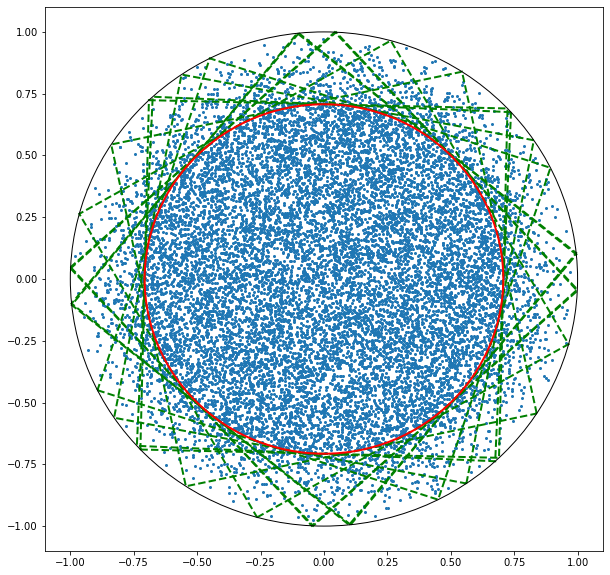

In [2]:
import math
from matplotlib.transforms import Affine2D

rho_x = np.random.uniform(-np.sqrt(2)/2, np.sqrt(2)/2, 15000)
rho_y = np.random.uniform(-np.sqrt(2)/2, np.sqrt(2)/2, 15000)
phi = np.random.uniform(0, 2*np.pi, 15000)

def rotate(x, y, rad):
        xx = np.cos(rad)*x - np.sin(rad)*y
        yy = np.sin(rad)*x + np.cos(rad)*y
        return(xx, yy)
    
xx, yy = rotate(rho_x, rho_y, phi)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
outerCircle = plt.Circle((0,0),1,color="black",fill=False)
innerCircle = plt.Circle((0,0),np.sqrt(2)/2,color="red",fill=False, linewidth = 2)

## base x,y for a square that fits and is being rotated
square_x = square_y = -np.sqrt(2)/2
## now rotate this base point a few times
square_phi = np.random.uniform(0, 2*np.pi, 10)
#square_ls = []
for i in square_phi:
    rect  = plt.Rectangle((square_x, square_y), np.sqrt(2), np.sqrt(2), fill = False
                          , linestyle = '--', color = 'green', linewidth = 2
                          , transform = Affine2D().rotate_deg_around(*(0,0), math.degrees(i))+ax.transData)
    ax.add_patch(rect)

    
ax.add_patch(outerCircle)
ax.add_patch(innerCircle)

ax.scatter(xx,yy, s =4)
plt.show()

### <span style="color:red">The Fix:</span> 
1. Sample points from squares of various orientations that would perfectly **fit the unit radius circle inside them** 
2. Reject points that are greater than a dist of 1 from the origin. 

*Basically just a modification on the reject sampling from a single square, shown below.*

## Method 2 - rejection sampling from the square

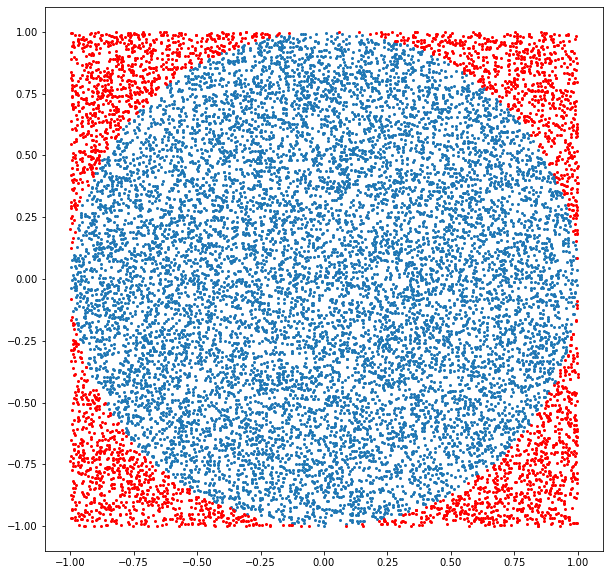

In [3]:
plt.figure(figsize=(10,10))

rho_x = np.random.uniform(-1, 1, 15000)
rho_y = np.random.uniform(-1, 1, 15000)

rejection_selection = ((rho_x**2 + rho_y**2)<=1)
rho_x_keep = rho_x[rejection_selection]
rho_y_keep = rho_y[rejection_selection]
rho_x_reject = rho_x[~rejection_selection]
rho_y_reject = rho_y[~rejection_selection]

plt.scatter(rho_x_keep, rho_y_keep, s = 4)
plt.scatter(rho_x_reject, rho_y_reject, s = 4, color = 'red')

## Method 3

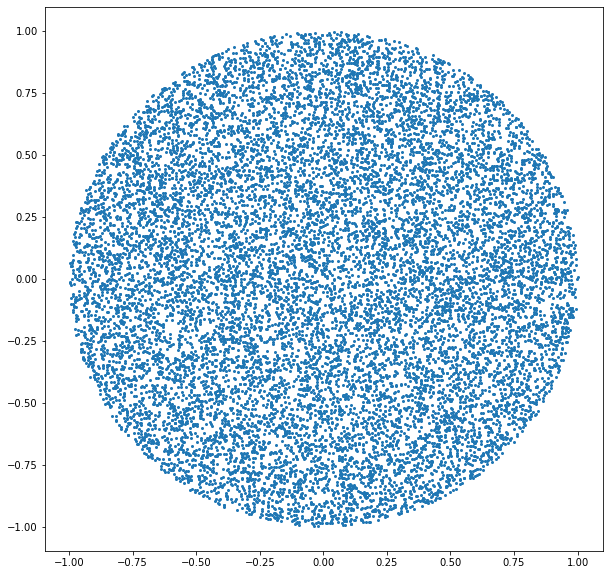

In [4]:
plt.figure(figsize=(10,10))

r = np.sqrt(np.random.uniform(0, 1, 15000))
phi = np.random.uniform(0, 2*np.pi, 15000)

x = r * np.cos(phi)
y = r * np.sin(phi)

plt.scatter(x, y, s = 4)